### Quickly looking at the blob overlap distribution here.

As I feel (based on my previous looks) that there are a lot of very low level overlaps (energy < 0.05 MeV or lower)

In [1]:
# import stuff
import sys,os,os.path

sys.path.append("../../")   # cite IC from parent directory
sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import core.functions as func
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load in isaura data
container = func.load_data('data/75_9e-3/isaura/')

tracks      = container[0]
particles   = container[1]
evtmap      = container[2]

50
100
150
200
250
300


In [3]:
display(tracks)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,5080000,0,1.068732,168.887195,64,9158,1,375.675,161.675,330.900281,...,351.363116,384.212773,278.679478,445.580642,0.498749,0.045366,0.000000,12.200000,14.000,13.534216
1,5080002,0,1.282228,248.187363,42,4241,4,-79.325,344.675,515.180105,...,652.083986,94.850390,364.689594,517.833734,0.367780,0.074493,0.000000,14.444444,14.125,14.263647
2,5080002,1,0.654868,69.761558,18,2150,4,-100.325,415.675,603.385913,...,649.876075,-89.159408,425.914687,608.759268,0.384472,0.085811,0.000000,14.444444,14.125,14.263647
3,5080002,2,0.147971,14.444444,2,457,4,133.675,360.675,499.470366,...,500.803068,151.087271,367.376060,502.128486,0.147971,0.147971,0.147971,14.444444,14.125,14.263647
4,5080002,3,0.023711,14.125000,2,79,4,30.675,411.675,618.959316,...,620.857981,34.008329,416.683574,620.686133,0.023711,0.023711,0.023711,14.444444,14.125,14.263647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251826,4060710,0,0.568012,71.474342,32,7496,1,302.675,276.675,522.659780,...,529.652476,337.047409,282.508143,524.696333,0.156316,0.043336,0.000000,14.500000,13.000,14.432458
251827,4060712,0,0.895780,100.681739,42,6285,4,11.675,412.675,332.916150,...,343.974535,19.441606,473.057348,414.524553,0.626525,0.082889,0.000000,13.000000,14.375,12.914461
251828,4060712,1,0.000598,0.000000,1,12,4,-3.325,364.675,351.397889,...,351.397889,-1.832545,365.692154,351.397889,0.000598,0.000598,0.000598,13.000000,14.375,12.914461
251829,4060712,2,0.000392,0.000000,1,9,4,72.675,411.675,357.396638,...,357.396638,73.668721,412.679487,357.396638,0.000392,0.000392,0.000392,13.000000,14.375,12.914461


In [4]:
# satellite track removal
nosat_tracks = func.remove_low_E_events(tracks)

# fiducial track cut
fiducial_track = func.fiducial_track_cut_2(nosat_tracks, lower_z = 20, upper_z = 1170, r_lim = 415)

# one track cut
one_track = func.one_track_cuts(fiducial_track)


/home/e78368jw/Documents/NEXT_CODE/next_misc/core/functions.py:318: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


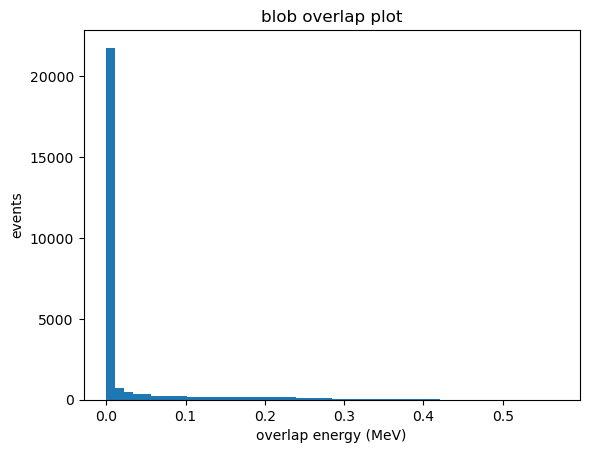

In [9]:
func.plot_hist(one_track, column = 'ovlp_blob_energy', binning = 50, title = 'blob overlap plot', x_label = 'overlap energy (MeV)', log = False)